# COGS 108 - Final Project 

# Names

- Sierra Stump
- Yisha Zhang
- Katie Chen
- Austin Labador
- Hao Luo

# Overview

In this report, we explore the possible relations between tags (a tool/feature supported by Youtube) and the popularity (measured by number of views) of Youtube videos, in order to find out some possible ways to increase video views by using proper tags. More specifically, we trained two linear regressions models to prove that there is a positive correlation between number of tags and number of views, as well as number of TOP tags (more details below) and number of views. On the other hand, we performed a sentiment analysis to analyze the connotation of the tag words with the highest count. 

# Research Question

How do tags of Youtube videos affect their number of views? 
- Will the number of tags affect the number of views? 
- Will the existence of certain popular tags affect the number of views? 
- Will the connotation of tags affect the number of views?

## Background and Prior Work

Just like any other content distribution network such as Facebook, Youtube has its own recommendation system which selects the "best" content to feed to users. Youtubers from all around the world has been trying to figure out how the system works in order to make videos that is liked by both the users and the system (which will eventually attract more users). Some common techniques to increase view are using visually-appealing thumbnails and having click-bait titles. However, these tools that appeal directly to users' eyes might not be able to fool the recommender system, since everything becomes data in the system.

Nevertheless, there is one useful tool that a lot of Youtubers often ignore, which is the tags under each video. These tags are editable by the author when uploading the video, and in fact serve as a better source of information (at least to the computer) than things like title and descriptions.

We all know that when users search for videos with keywords, they usually search for single words or phrases instead of complete sentences. However, titles and descriptions usually consist of meaningful sentences, which means it's very unlikely that multiple words with similar meanings would appear in the same title or description. For example, people would use either "Why is smoking harmful" or "Why are cigarettes bad for you" as a title, but no one would use "Why is/are smoking/cigarettes harmful/bad". This cause potential audience loss because there are going to be people who search for "smoking" and others searching for "cigarettes".

This wouldn't be a problem for tags because tags are very similar to keywords. You can have multiple tags that has similar meanings for the same video, which will help avoid the problem mentioned above.

The potential advantage of using tags is far more than what we mention here, and there are tons of non-acedemic posts online that teach people how to use tags to increase views. 

Non-acedemic sources:
- 1) https://whyvideoisgreat.com/optimize-youtube-tags
- 2) https://longtailpro.com/best-tags-for-youtube/

In the acedemic field, there are also lots of papers trying to utilize the information provided by tags. For example, the paper "Enriching and localizing semantic tags in internet videos" [1] by Lamberto Ballan and others talks about how tags are used to retrieve multimedia content and ease browsing and searching.

Another paper titled "Finding meaning on YouTube: Tag recommendation and category discovery" [2] by George Toderici and others presents a way to automatically generate tags for Youtube videos.

References:
- 1) https://dl.acm.org/citation.cfm?id=2072060
- 2) https://ieeexplore.ieee.org/abstract/document/4438859

Therefore, in this report, we will be exploring the relation between the tags of Youtube videos and their number of views (as a measurement of the popularity of the video)

# Hypothesis

Based on our background research:

We hypothesize that videos that use more tags will have more views than those with less tags, because more tags means more information for the system to analyze and thus means higher chance to be recommended to users.

Similarly, we predict that videos with certain popular tags will have more views than those with none. For example, after the release of a new iPhone, the tag "iPhone" might become very popular because of the large number of videos reporting it. At the same time, people are going to be interested in the new iPhone because of its popularity, which might indirectly results in the videos with the tag "iPhone" having more views than those that don't.

Last but not least, we hypothesize that videos with more positive tag words will have more views than those with negative tag words, because positive content are generally more appealing to people than negative ones.

# Dataset(s)

The dataset we use contains daily information concerning top trending videos on YouTube:

- Dataset Name: Trending YouTube Video Statistics
- Link to the dataset: https://www.kaggle.com/datasnaek/youtube-new
- Number of observations: 40949

This dataset includes data from several countries, but we are only focusing on the data collected from the United States. Each data row contains the following information: Video ID, Trending Date, Title, Channel Title, Category ID, Publish Time, Tags, Views, Likes, Dislikes, Comment Count, Thumbnail Link, Comments Disabled, Ratings Disabled, Video Error or Removed, and Description.

# Setup
## Import libraries & tools

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200) # always display 200 rows
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17,7) # increase figure size
import seaborn as sns
sns.set(style ='white', font_scale=2) #set style
from scipy.stats import uniform, norm, bernoulli, poisson
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import string
import seaborn as sns

[nltk_data] Downloading package stopwords to /home/sstump/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sstump/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading Data

In [4]:
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
# Size of data set: used to verify that all of the data was read in correctly
df.shape

(40949, 16)

# Date Wraggling and Cleaning
## 1. Date reformatting
Changing date format of both "trending_date" and "publish_time" to yyyy-mm-dd so that it's easier to read and order

In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m').dt.date
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date

## 2. Drop irrelevant columns
Since we are only curious about the relation between tags and views, a lot of information in the dataframe are actually irrelevant. Therefore, we decide to remove them from the data frame so that we don't need to worry about tham again when handling missing values.

However, we are keeping the likes, dislikes, and comment_count columns because they can also be measurement of "popularity" of a video, so they are potentially useful if the data of views is undermined.

In [7]:
df.drop(labels = ['video_id', 'thumbnail_link', 'channel_title', 'category_id', 
                  'description', 'comments_disabled', 'ratings_disabled'], axis = 1, inplace = True)

## 3. Drop error or removed videos
Delete videos that are removed or have errors because these rows might contain invalid/wrong data, which may falsify our analysis later.

In [8]:
df = df[df['video_error_or_removed'] == False]
df.drop('video_error_or_removed',axis=1,inplace=True)

## 4. Missing values
After an initial observation it seems like there is no NaN values in the tags column.

In [9]:
n_nan_tags =  sum(df['tags'].isnull())
print(n_nan_tags)

0


However, if we look more closely, there are actually lots of videos that have no tags. These videos have "none" as the value for the tags column. Since it's very difficult for us to verify whether these videos actually don't have tags or the author of this dataset fail to retrieve this information, it would be better to not use this part of the data. Therefore, we decide to remove it from the data frame.

In [10]:
df[df['tags'] == "[none]"].head()

,trending_date,title,publish_time,tags,views,likes,dislikes,comment_count
42,2017-11-14,Dennis Smith Jr. and LeBron James go back and ...,2017-11-13,[none],945,7,5,8
97,2017-11-14,Edna's registered owner thought she was dead f...,2017-11-10,[none],284666,16396,81,949
133,2017-11-14,"President Bill Clinton On Dictators, Democracy...",2017-11-09,[none],366180,4364,4448,1997
136,2017-11-14,Alicia Keys - When You Were Gone,2017-11-09,[none],95944,1354,181,117
175,2017-11-14,Sphaera - demonstrating interaction,2017-11-04,[none],1827,3,0,2


In [11]:
len(df[df['tags'] == "[none]"])

1521

In [12]:
# Just in case we want to use it for comparison later, we will also make a copy of the 
# data set with the "none" values first, and save it in 'df_withNoTags'
df_withNoTags = df.copy()
df = df[df['tags'] != "[none]"]

## 4. Tags and Title format clean up

Convert all string data to lowercase and strip all the extra/useless spaces so that they are easier to handle

In [13]:
# function that strip the white space of the string
def strip(name) :
    return str(name).strip()

# function that turn string to lower case
def lower_case(name):
    return str(name).lower()

# strip the leading and ending white space in tags column
df['tags'] = df['tags'].apply(strip)
df['title'] = df['title'].apply(strip)

# change the tags column to all lower case lettering
df["tags"] = df["tags"].apply(lower_case)
df["title"] = df["title"].apply(lower_case)

## 5. Dropping rows where number of views is too large


In [19]:
df = df[df['views'] <= 20000000]

In order to make the graph easier to visualize, we dropped the videos that have over 20 million views. We consider these videos outliers because the majority of the other videos have views around 7 million or less. When examining the videos with 20 million views, we observed that most of them are music videos. It makes sense why music videos would have a significantly larger amount of views when compared to videos posted by ordinary YouTubers. We decided to drop this data because it doesn’t significantly change the shape of the graph, therefore the resulting analysis should not change. 

Take a look at what the data looks like after cleaning

In [20]:
df.head()

,trending_date,title,publish_time,tags,views,likes,dislikes,comment_count
0,2017-11-14,we want to talk about our marriage,2017-11-13,shantell martin,748374,57527,2966,15954
1,2017-11-14,the trump presidency: last week tonight with j...,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,2017-11-14,"racist superman | rudy mancuso, king bach & le...",2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,2017-11-14,nickelback lyrics: real or fake?,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,2017-11-14,i dare you: going bald!?,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


# Data Visualization
## 1. Histograms of numerical data
First let's take a look at the distribution of the number of views of all the videos.

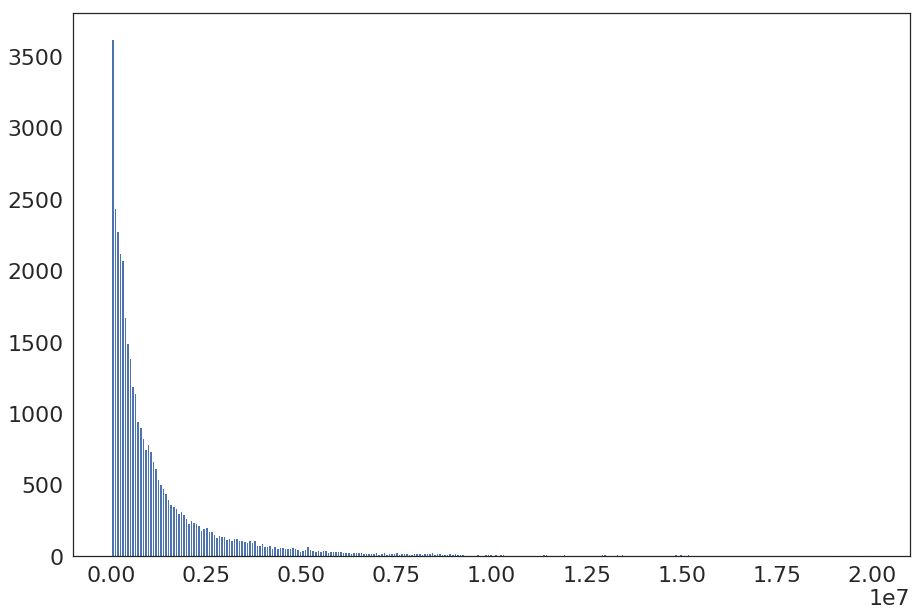

In [21]:
plt.figure(figsize=(15,10))
hist_views = plt.hist(df['views'],300)
fig_views = plt.gcf()

As we can see, the distribution is definitely skewed right, with a smooth (but not linear) decreasing trend. Most videos has a small number of views and very few videos have a view over 10,000,000 times.

### Shape & Central Tendency & Variability

To get a more precise (numerical) idea of the distribution of the view data, we can look at some statistics of the data.

In [22]:
df['views'].describe()

count    3.871500e+04
mean     1.647253e+06
std      2.763398e+06
min      5.490000e+02
25%      2.417205e+05
50%      6.626880e+05
75%      1.718966e+06
max      1.999988e+07
Name: views, dtype: float64

In [23]:
# Variance for views
var_views = df['views'].var()
print(var_views)

7.63636671232e+12


As the statictics shows, the video with the least view has 549 views, and the video with the most view has about 200,000,000 views. The range of the data is huge, and the standard error is even larger than the mean. This confirms that the distribution of the data is skewed, and shows that the data are sparsely distributed.

## 2. Correlation Heatmap

Next, we can use a heatmap to show the correlation between different columns in the dataframe (but only numerical data)

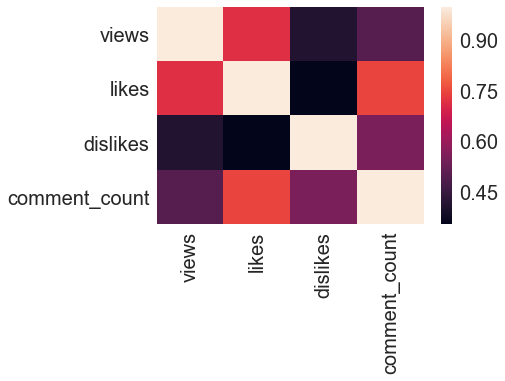

In [17]:
corr = df.corr()
sns.heatmap(corr)

From the heatmap we can see that comment_count and likes are strongly correlated, as well as views and likes. This could be explained by the fact that when people like a video, they are more likely to leave a comment. Also, due to the nature of the recommendation algorithm of Youtube, usually people only click on and watch the videos that they are more likely to enjoy. This is further supported by the fact that the relation between views and dislikes are not as strong, because Youtube wouldn't want to recommend videos that people don't like

# Analysis I: Linear Regression on Number of Tags

Does more tags means more views? To prove that there is a positive correlation between number of tags and number of views, we chose to do a linear regression. But first we need to retreive the number of tags for each video.

## Counting the number of tags per Video
Since tags in the dataframe are 'string' data types, we first thought about comparing the lengths of the strings and use the idea that longer string means a higher number of tags. However, we then discovered that there are separations signs ('|') between the tags. Therefore, we can actually just find out how many of these separations there are and add two to it, to determine the amount of tags of each video. Videos without tags are already removed so we don't need to worry about them

In [18]:
number_of_tags = df['tags'].str.find('|') + 2

Add this information to our main dataframe and draw a histogram to look at the distribution

In [19]:
trending_date_test = df['trending_date']
df['number_of_tags'] = number_of_tags
df.head()

,trending_date,title,publish_time,tags,views,likes,dislikes,comment_count,number_of_tags
0,2017-11-14,we want to talk about our marriage,2017-11-13,shantell martin,748374,57527,2966,15954,1
1,2017-11-14,the trump presidency: last week tonight with j...,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,36
2,2017-11-14,"racist superman | rudy mancuso, king bach & le...",2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,17
3,2017-11-14,nickelback lyrics: real or fake?,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,16
4,2017-11-14,i dare you: going bald!?,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,6


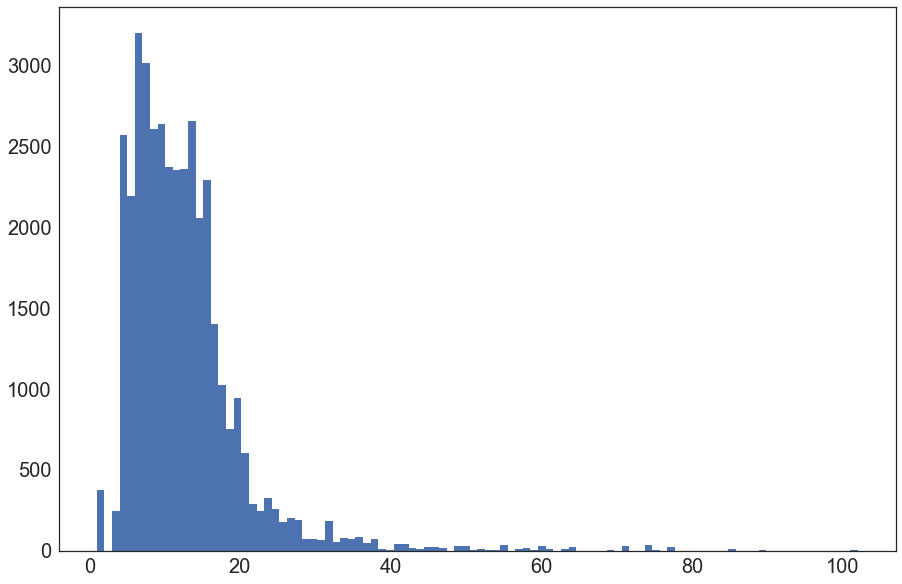

In [20]:
plt.figure(figsize=(15,10))
hist_numOfTags = plt.hist(df['number_of_tags'],100)
fig_views = plt.gcf()

From the graph we can see that the distribution is also skewed right. Most of the videos has about 5 to 15 tags, but there are also videos with 80+ tags.

## Training a regression model
With the number of tags, we can then use it as the explanatory variable in a linear regression model and use the number of views as the dependent variable. But first, we will split the whole data set into training and testing sets with a 2:1 ratio, so that we can determine the accuracy of our model later.

In [21]:
views = np.array(df['views'])
numOfTags = np.array(df['number_of_tags'])

Coefficients:  [2562.2153975]
Mean squared error: 7571400777867.14
Variance score: 0.00


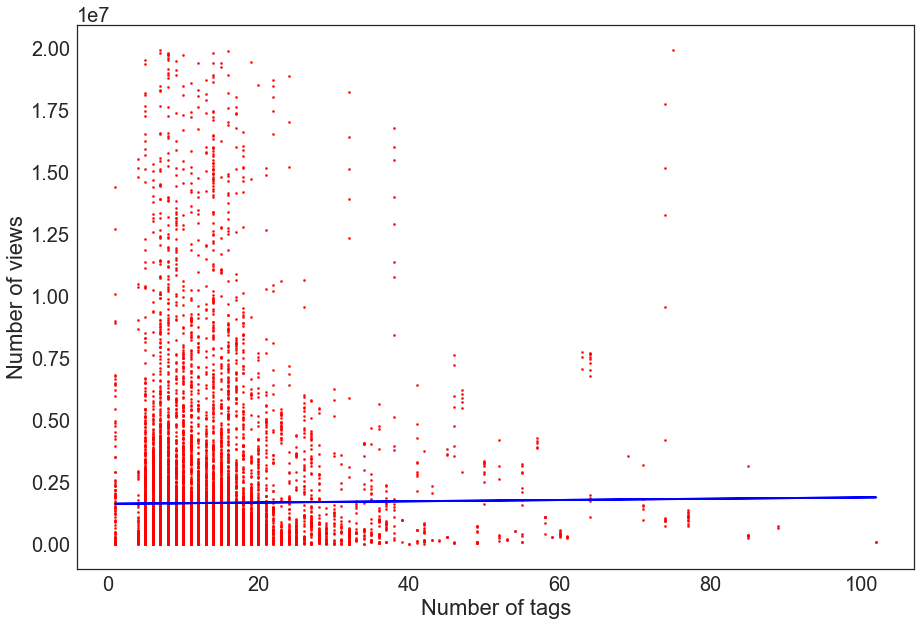

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# split into train and test sets
X_train_tags, X_test_tags, y_train_views, y_test_views = train_test_split(numOfTags, views, test_size=0.33, random_state=42)

X_train_tags = X_train_tags.reshape(-1, 1)
X_test_tags = X_test_tags.reshape(-1, 1)
y_train_views = y_train_views.reshape(-1, 1)
y_test_views = y_test_views.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train_tags, y_train_views)

y_test_views_prediction = regr.predict(X_test_tags)

# The coefficients
print('Coefficients: ', regr.coef_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_views, y_test_views_prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_views, y_test_views_prediction))

# Plot outputs
plt.figure(figsize=(15,10))
plt.scatter(X_test_tags, y_test_views, s= 5, color='red')
plt.plot(X_test_tags, y_test_views_prediction, color='blue', linewidth=2)
plt.xlabel('Number of tags')
plt.ylabel('Number of views')
plt.show()

The result of the regression is not very satisfying. Although the coefficent is indeed positive, we can see that the model's accuracy is extremely low. The red dots in the graph represents the actual (number of tags, number of views) points, while the blue line is the regression line we fit. Looking at the scatter plot, we observe that videos with the same number of tags can have extremely different number of views. This is not surprising because we are not taking the "quality" of tags into account here. In other words, some tags might be better than others, and although the number of tags is the same, the effect produced by these tags might differ greatly. Therefore, there is no enough evidence to support our hypothesis for the first question.

# Analysis II: Linear Regression on Top Tags

Since the number of tags itself doesn't tell the whole story, how about the number of "useful" tags? In this report, we decide to measure the "usefulness" of a tag by looking at its count (how frequently a tag word is used). We choose this method based on this post: https://whyvideoisgreat.com/optimize-youtube-tags. In the post, the author mentions that we can "spy on our competitors" and see what tags they are using. This inspires us that tags that are commonly used might be a sign of popular videos, because the underlying message is that a lot of people are interested in this content. Therefore, we decided to do another regression on the number of TOP tags. But first we need to find out which tags are used more often than others.

### Format and clean up tags data

In [25]:
# Function to remove stop words using the stop_words list
def remove_stop_words(list):
    filtered_sent = []
    for w in list:
        if w not in stop_words:
             filtered_sent.append(w)
    return filtered_sent

In [26]:
stop_words = stopwords.words('english')
tags_words = df['tags'].str.lower().str.cat(sep=' ')
tags_words = re.sub('[^A-Za-z]+', ' ', tags_words)
tags_words_list = WhitespaceTokenizer().tokenize(tags_words)

# Remove stop words
filtered = remove_stop_words(tags_words_list)
tags_words_series = pd.Series(filtered)

# Remove these stop words manually because they were not in the nltk stop words library
tags_words_series = tags_words_series.replace(to_replace = 'x', value = '')
tags_words_series = tags_words_series.replace(to_replace = 'sp', value = '')
tags_words_series = tags_words_series.replace(to_replace = 'b', value = '')

### Determine what the most common tag words are

In [27]:
# use FreqDist to determine the most common tag words
tags_count = FreqDist(tags_words_series)
tags_count.columns = ['tag','count']

### Create a line graph to display the most frequently used tag words

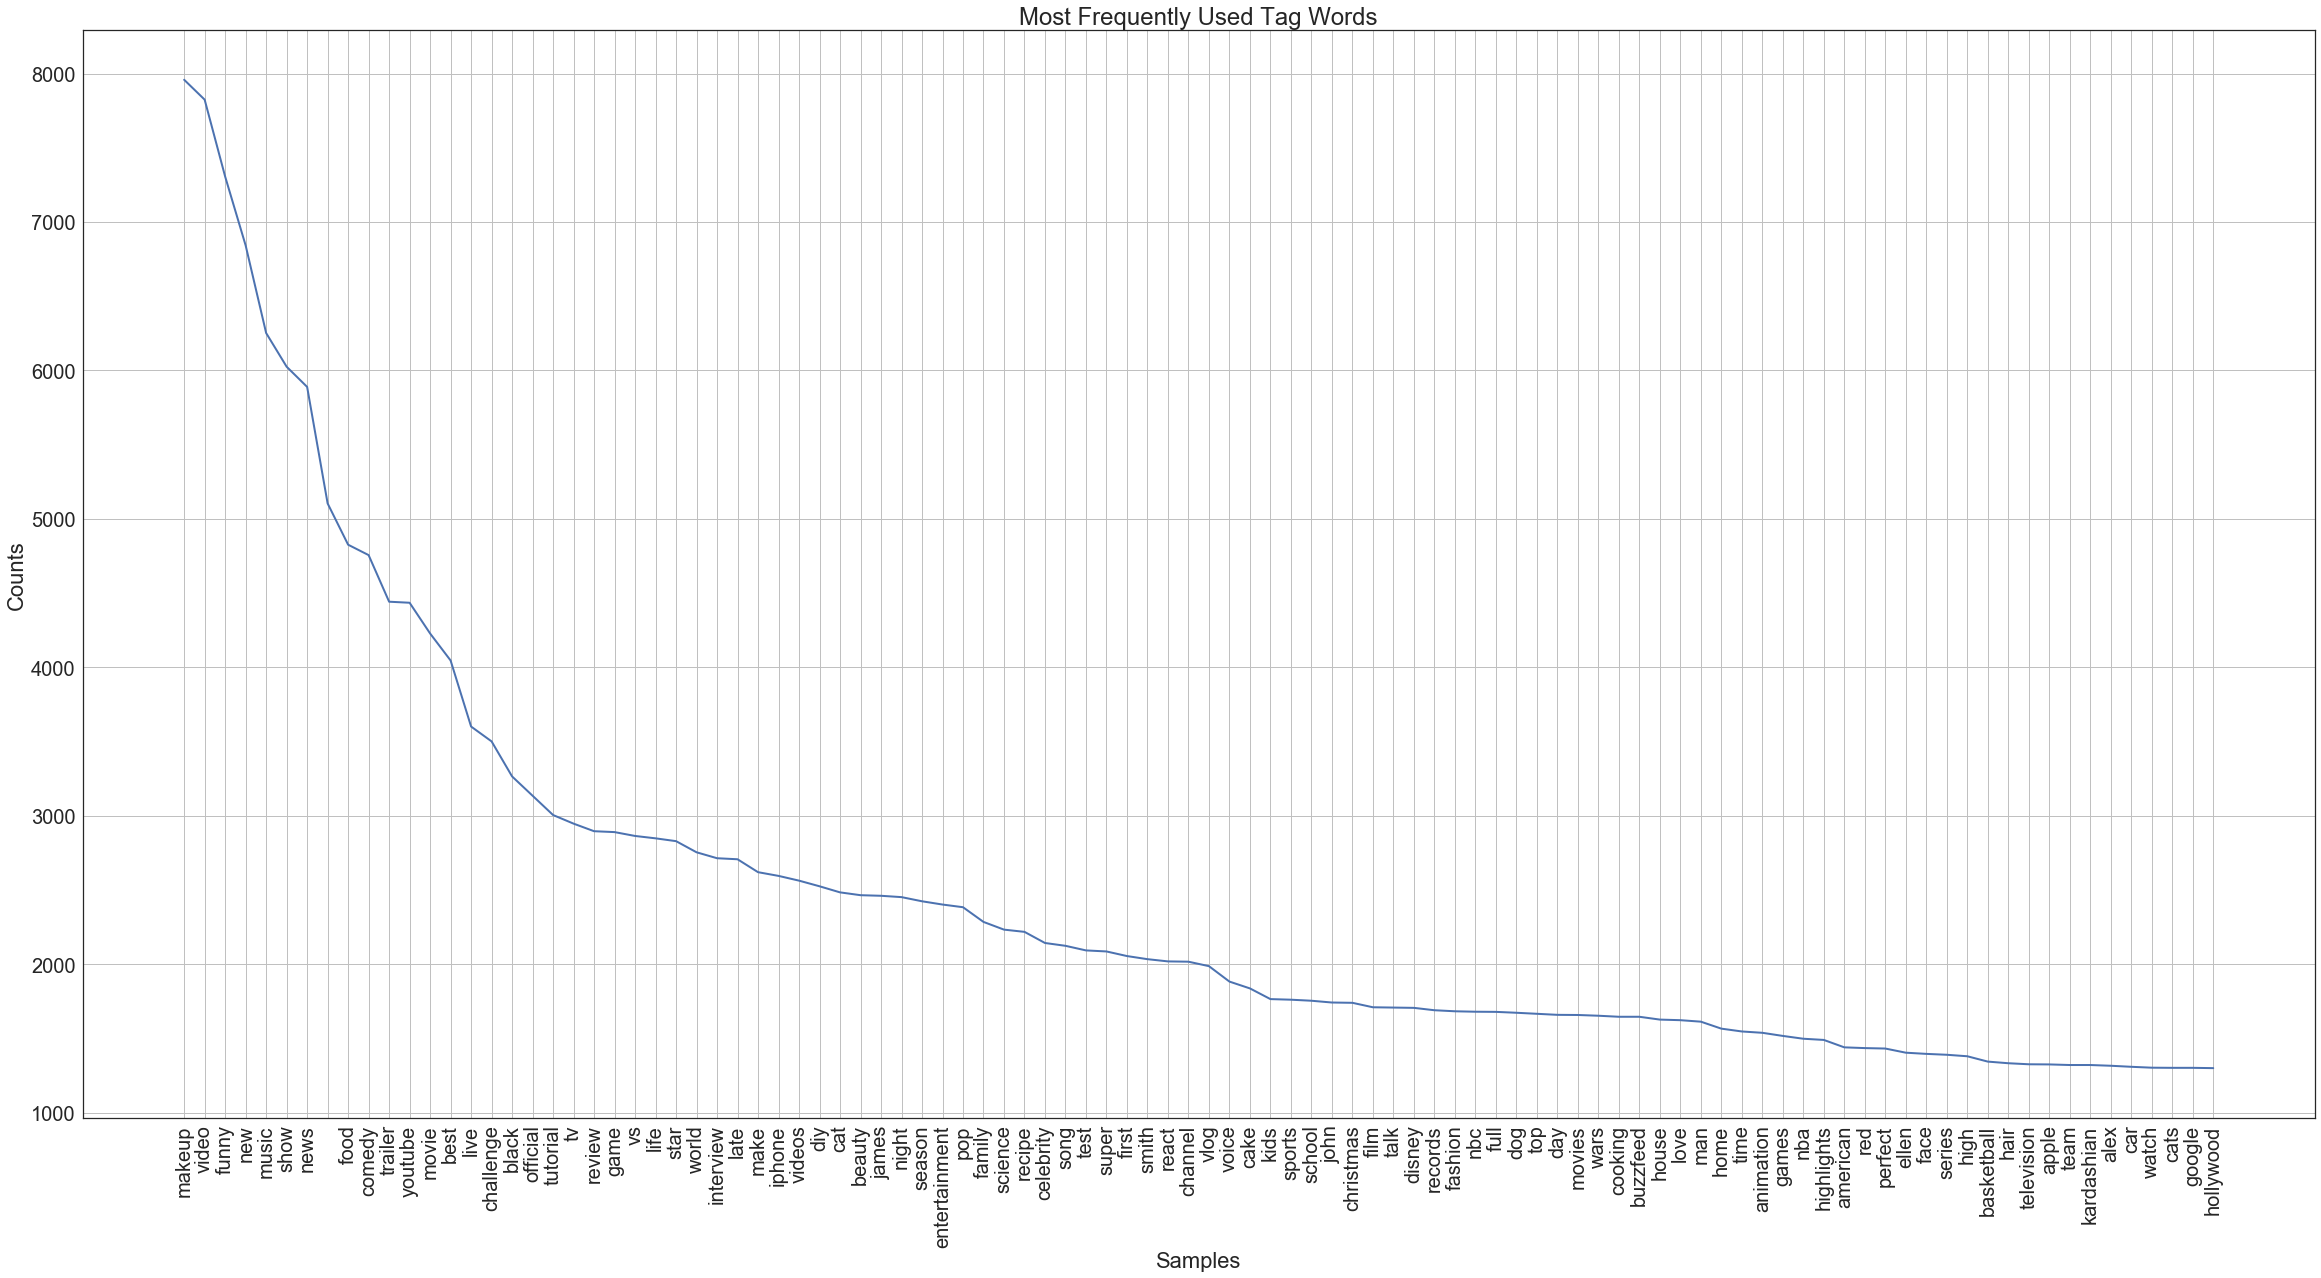

In [26]:
# Plot the 100 most frequently used tag words
plt.figure(figsize=(40, 20))  
tags_count.plot(100, title = 'Most Frequently Used Tag Words', cumulative = False)

The graph above provides information about the most freqeuntly used tag words. We decided to observe the 100 words with the highest count. It is interesting to note that the graph begins to normalize and flatten around words that have a count of 2000. From the graph we can see that the top 100 tag words were used at least 1000 times. Thus, we can create a smaller subset of our data that only focuses on tag words that had a count value of 1000 or more. This will make running functions on our data quicker. 

The tag word that was used the most frequently is “makeup”. The words “new” and “tutorial” also have a high tag word count. This indicates that making YouTube makeup tutorial videos is a popular right now. We also found that there are a lot of names in our extracted tag words, which also indicates people’s interests in following up celebrities. Additionally, it is interesting that “christmas” is one of the most frequently used tag words. Since Christmas is a seasonal holiday, we expected that it would not be in the top 100 tag words. 

In [28]:
# create a series with the number of occurrences of each tag
series_count = tags_words_series.value_counts()
# convert the series into a dataframe
df_word_count = pd.DataFrame({'word':series_count.index, 'count':series_count.values})
# make a smaller dataframe of only the relevant tag words
df_word_count = df_word_count[df_word_count['count'] >= 1000]
df_word_count.columns = ['word', 'count']
# create a new dataframe with only a column for the most common tag words
df_dropped = df_word_count.drop(['count'], axis=1)
# convert the df to a list 
list_100 = df_dropped.values.tolist()

In [29]:
numOfTopTags = [0 for x in range(len(df.index))]

for i in range(len(df.index)):
    if i not in df.index:
        i += 1
        continue
    tags_entry = df['tags'][i]
    for top_tags in list_100:
        if top_tags[0] in tags_entry:
            numOfTopTags[i] += 1

df.insert(5 , "number_of_top_tags" , numOfTopTags)

Now, with the number of top tags of each video, we can train the regression model just like we did in last section.

Coefficients:  [11538.09911106]
Mean squared error: 7566257585382.10
Variance score: 0.00


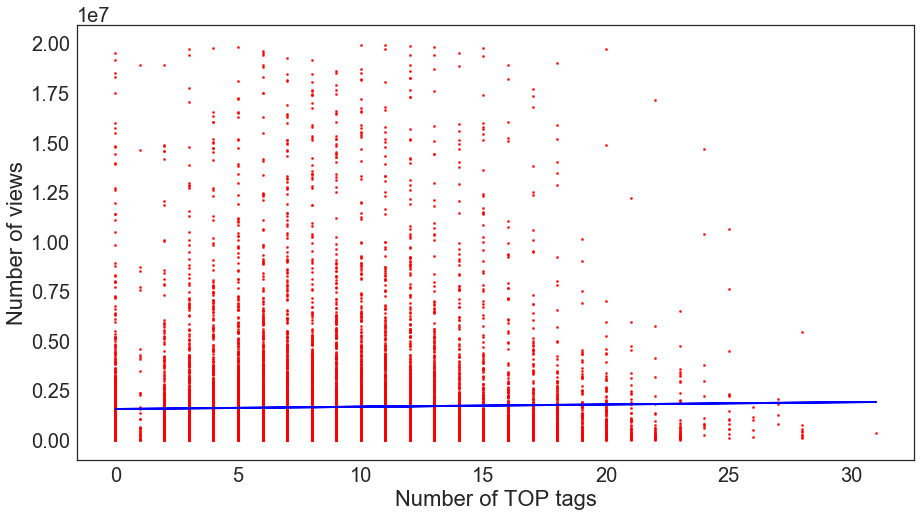

In [29]:
array_numOfTopTags = np.array(numOfTopTags)

X_train_top_tags, X_test_top_tags, y_train_views, y_test_views = train_test_split(array_numOfTopTags, views, test_size=0.33, random_state=42)

X_train_top_tags = X_train_top_tags.reshape(-1, 1)
X_test_top_tags = X_test_top_tags.reshape(-1, 1)
y_train_views = y_train_views.reshape(-1, 1)
y_test_views = y_test_views.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train_top_tags, y_train_views)

y_test_views_prediction = regr.predict(X_test_top_tags)

# The coefficients
print('Coefficients: ', regr.coef_[0])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_views, y_test_views_prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_views, y_test_views_prediction))

# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(X_test_top_tags, y_test_views, s = 5, color='red')
plt.plot(X_test_top_tags, y_test_views_prediction, color='blue', linewidth=2)
plt.xlabel('Number of TOP tags')
plt.ylabel('Number of views')
plt.show()

Again, the result did not come out as what we expected. Seems like most of the videos have 0 "most popular" (top) tags. Similar to the last regression, the accuracy is low. This also suggests that number of top tags is not a good way to measure the quality of tags. One possible explanation is that we are treating all the popular tags the same way, but in fact their level of popularity is not the same. So we should probably take the acutal count of each tags into account as its weight in the number of top tags. But again, there is no enough evidence to support our second hypothesis.

# Analysis III: Sentiment Analysis
We chose to preform Sentiment Analysis on our data. Specifically, we looked at the most frequently utilized tag words. 

We wrote one function to remove irrelevant stop words from our data and another function to preform stemming on the tag words. 

## Lexicon Analysis

compound score - metric that calculates the sum of all the lexicon ratings and normalizes between -1 (most extreme negative) and 1 (most extreme positive).

- positive: compound >= 0.05
- netural: -0.05 < compound <0.05
- negative: <= -0.05

In [30]:
# Create a function that will output the dataframe that stores sentiment information

def get_sentiments(list_in):
    list_result = []
    for smallList in list_in:
        list_result.append(smallList[0])
    
    analyser = SentimentIntensityAnalyzer()
    output = pd.DataFrame()
    
    for i in range(0, len(list_in)):
        word = list_result[i]
        ss = analyser.polarity_scores(word)
        ss['word'] = word
        output = output.append(ss, ignore_index=True)
        i = i + 1
    return output

We can then use the get_sentiments() function to get the sentiment of the most common tag words.

In [34]:
# get the sentiment measures
sentiment = get_sentiments(list_100)
sentiment.head()

,compound,neg,neu,pos,word
0,0.0000,0.0,1.0,0.0,makeup
1,0.0000,0.0,1.0,0.0,video
2,0.4404,0.0,0.0,1.0,funny
3,0.0000,0.0,1.0,0.0,new
4,0.0000,0.0,1.0,0.0,music


In [32]:
# showing only negative words
neg_df = sentiment[sentiment['neg'] == 1]
neg_df

,compound,neg,neu,pos,word
69,-0.5574,1.0,0.0,0.0,wars
145,-0.5994,1.0,0.0,0.0,war
161,-0.3818,1.0,0.0,0.0,battle


In [33]:
neg_df.describe() 

,compound,neg,neu,pos
count,3.000000,3.0,3.0,3.0
mean,-0.512867,1.0,0.0,0.0
std,0.115433,0.0,0.0,0.0
min,-0.599400,1.0,0.0,0.0
25%,-0.578400,1.0,0.0,0.0
50%,-0.557400,1.0,0.0,0.0
75%,-0.469600,1.0,0.0,0.0
max,-0.381800,1.0,0.0,0.0


Looking at our sentiment analysis data, we found that most of the tag words were marked as neutral. The two negative words we observed were "war" and "battle". This makes sense because a lot of gamers use YouTube to stream their content. The mean value for the negative sentiment words is a bit higher since there are only three negative words, thus we can't rely on the accuracy of this information as much as we can for the positive words since the sample size is so small.

In [34]:
# showing only positive words
pos_df = sentiment[sentiment['pos'] == 1]
pos_df

,compound,neg,neu,pos,word
2,0.4404,0.0,0.0,1.0,funny
9,0.3612,0.0,0.0,1.0,comedy
13,0.6369,0.0,0.0,1.0,best
15,0.0772,0.0,0.0,1.0,challenge
33,0.5859,0.0,0.0,1.0,beauty
37,0.4215,0.0,0.0,1.0,entertainment
45,0.5994,0.0,0.0,1.0,super
66,0.2023,0.0,0.0,1.0,top
73,0.6369,0.0,0.0,1.0,love
83,0.5719,0.0,0.0,1.0,perfect


In [35]:
pos_df.describe()

,compound,neg,neu,pos
count,18.000000,18.0,18.0,18.0
mean,0.446178,0.0,0.0,1.0
std,0.148003,0.0,0.0,0.0
min,0.077200,0.0,0.0,1.0
25%,0.421500,0.0,0.0,1.0
50%,0.449600,0.0,0.0,1.0
75%,0.556575,0.0,0.0,1.0
max,0.636900,0.0,0.0,1.0


Here we observe that there are a lot more positive sentiment words in comparison to negative words. This shows that YouTube viewers tend to watch videos for enjoyment. Specifically, the words "funny", "comedy", and "humor" indicate that viewers like watching videos that will make them laugh. The words "best", "super", "top", "perfect", and "good" are all generic adjectives that can be applicable to a variety of videos. 

In [35]:
#showing only neutral words
neu_df = sentiment[sentiment['neu'] == 1]
# this dataframe is very long so just print the head
neu_df.head()

,compound,neg,neu,pos,word
0,0.0,0.0,1.0,0.0,makeup
1,0.0,0.0,1.0,0.0,video
3,0.0,0.0,1.0,0.0,new
4,0.0,0.0,1.0,0.0,music
5,0.0,0.0,1.0,0.0,show


In [36]:
neu_df.describe()

,compound,neg,neu,pos
count,140.0,140.0,140.0,140.0
mean,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.0
25%,0.0,0.0,1.0,0.0
50%,0.0,0.0,1.0,0.0
75%,0.0,0.0,1.0,0.0
max,0.0,0.0,1.0,0.0


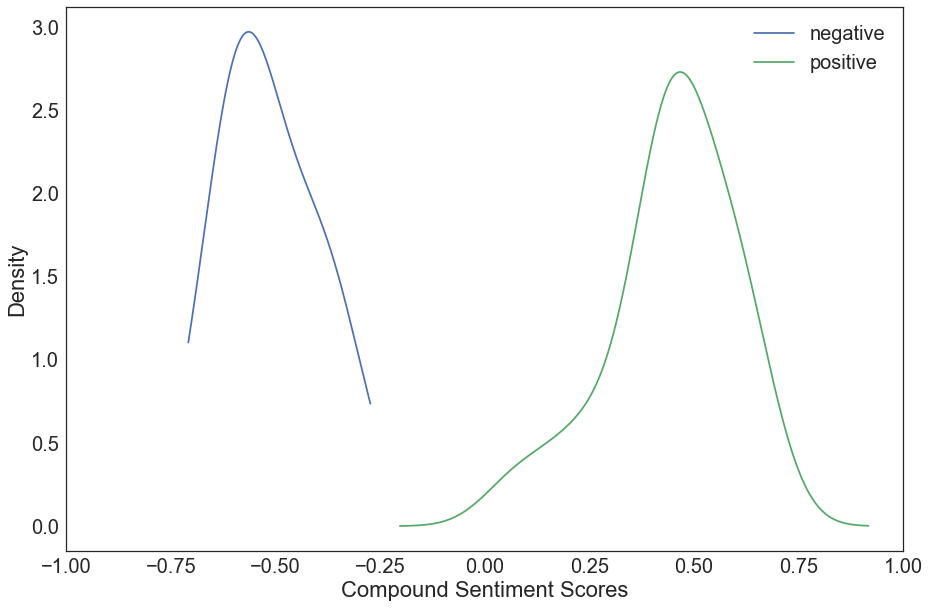

In [38]:
plt.figure(figsize=(15,10))

neg_df['compound'].plot.density(label = 'negative')
pos_df['compound'].plot.density(label = 'positive')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

The positive and negative graphs both have normal distribution with the mean at -0.5 and 0.5 respectively. Since there were more positive words it makes sense that it spans a greater range of compount sentiment words. 

Based on our sentiment analysis there are more positive words in the tags in comparison to negative words in which people may assume that people watch videos for entertainment. However, in reality, it is too early to make the conclusion that positive tags will give more views because most of the tag words were actually neutral.

Since we used a predetermined list to determine the sentiment of each tag word, we are unsure of how the assignment of each sentiment was given. Therefore, people from different socio-cultural backgrounds may interpret the sentiment of words differently. For instance, the word “family” was assigned a neutral sentiment, but it could also be perceived as having a positive sentiment by some people. Also, because we are separating the tag words from the whole phrase or sentence, this could remove the meaning or the intended sentiment out of the word.

In the future, if we could conduct a survey and ask people how they view certain words, as either positive or negative, we can use their opinions to determine the sentiment of the tag words.


# Ethics & Privacy
### Ethics:
Our goal is to see the potential of video tags to influence the views of the videos. Since the data has no underlying assumptions about users, there should be no bias based on different populations. Also, we are only using data of trending Youtube videos in the US within the past few years, and not data from any other other countries. This will prevent us from making generalizations of other countries and places. Last but not least, we can assure that the data we use is approved by Youtube because all information can be accessed on Youtube, except that the dataset collects and integrates into one easy to read file.
### Privacy:
The data that we used is from a public source and the information that is provided does not have any identifying information so it is ethical for us to use for our analysis. There are names of Youtube channels and authors in the original dataset but this information is public and does not relate to our research question, so we chose to remove it. Also, the topic and hypothesis itself is not related to anything that is personal (tied to any individuals) or potentially vulnerable. Therefore, we don't have any particular concerns regarding privacy. 

# Conclusion & Discussion

We hypothesized that more tags in the video will lead to a larger number of views. We also predicted that videos that contain popular tag words will have more views than those videos that don’t have popular tag word. In addition, we predicted that the tags with more positive connotation will have more views than the others. 

We found while there is a small positive correlation between tags and views, the accuracy of the model is extremely low. Therefore, there is not enough evidence to support the first part of our hypothesis. When determining the “usefulness” of tags, we discovered that using the frequency of top tags is not a good way to measure the quality of tags. In addition to the accuracy of our regression model being low, there is not enough evidence to support our hypothesis. Through sentiment analysis on our dataset, we discovered that most of the tag words were considered ‘neutral’. However, when comparing ‘positive’ and ‘negative’ tag words, there seemed to be more ‘positive’ tag words than ‘negative’ tag words. 

### Limitation & Posible improvements
One of the limitations of our analysis is that our dataset is only based only on trending videos. Thus, any analysis done can only be applied to trending videos and can not be concluded about all of the videos that get posted on YouTube. Additionally, our dataset only includes videos over a short duration of time (several months). If we had data for a longer duration of time this would have given us a more accurate representation. Last, we chose to only utilize the videos that were from the United States. This is a limitation because it is not representative of the entire population, but rather of a subset. Thus, it doesn’t make a good representation of all youtube videos. For improvements in our studies, in the future we could have datasets from a greater time span. Moreover, instead of analyzing only trending videos, we could examine a dataset of all types of YouTube videos.